In [25]:
import string
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,r2_score
from sklearn import metrics
from sklearn import tree
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB


In [26]:
df = pd.read_csv("satgpa.csv", encoding='latin-1')
df.head()

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63


In [27]:
df.head()

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63


In [28]:
df.columns

Index(['sex', 'sat_v', 'sat_m', 'sat_sum', 'hs_gpa', 'fy_gpa'], dtype='object')

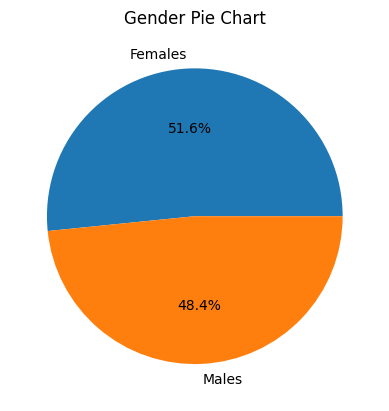

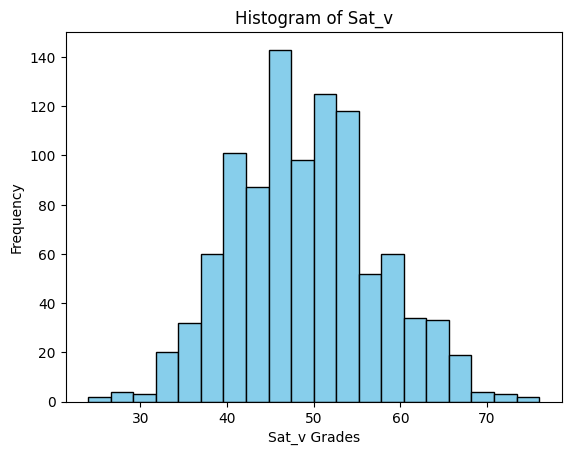

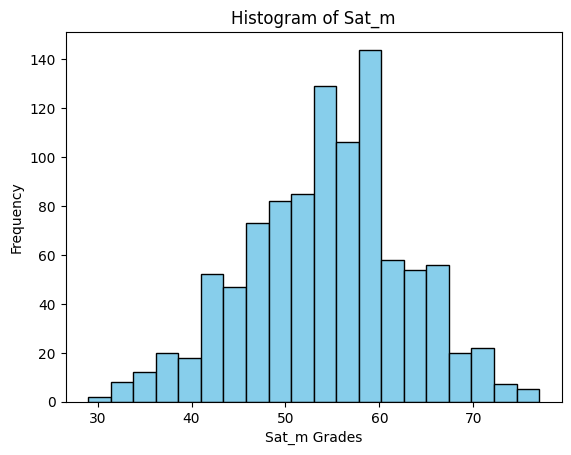

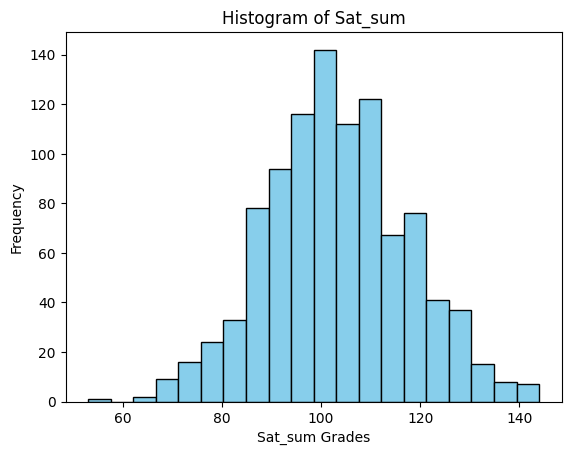

<function matplotlib.pyplot.show(close=None, block=None)>

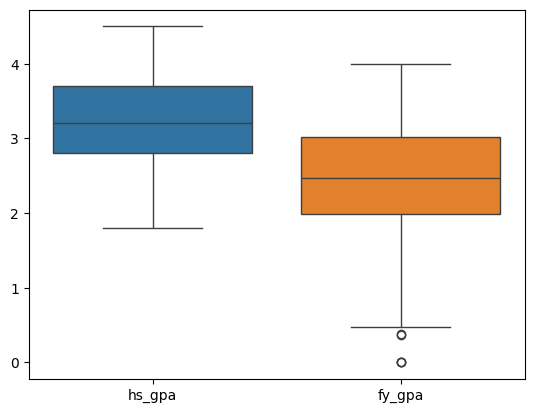

In [29]:
#Data Visualization
#Plotting Data individually

Gender = df['sex'].value_counts()
plt.pie(Gender, labels=['Females', 'Males'], autopct='%.1f%%')
plt.title('Gender Pie Chart')
plt.show()

Sat_V=df['sat_v']
plt.hist(Sat_V, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sat_v Grades')
plt.ylabel('Frequency')
plt.title('Histogram of Sat_v')
plt.show()

Sat_m=df['sat_m']
plt.hist(Sat_m, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sat_m Grades')
plt.ylabel('Frequency')
plt.title('Histogram of Sat_m')
plt.show()

Sat_sum=df['sat_sum']
plt.hist(Sat_sum, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sat_sum Grades')
plt.ylabel('Frequency')
plt.title('Histogram of Sat_sum')
plt.show()

High_School_GPA=df['hs_gpa']
First_Year_GPA=df['fy_gpa']
data = [High_School_GPA,First_Year_GPA]
sns.boxplot(data)
plt.show



Correlation Matrix:
              sex     sat_v     sat_m   sat_sum    hs_gpa    fy_gpa
sex      1.000000 -0.039160 -0.252366 -0.171827  0.141008  0.100242
sat_v   -0.039160  1.000000  0.466581  0.852262  0.359500  0.401390
sat_m   -0.252366  0.466581  1.000000  0.860333  0.378070  0.387118
sat_sum -0.171827  0.852262  0.860333  1.000000  0.430788  0.460281
hs_gpa   0.141008  0.359500  0.378070  0.430788  1.000000  0.543353
fy_gpa   0.100242  0.401390  0.387118  0.460281  0.543353  1.000000


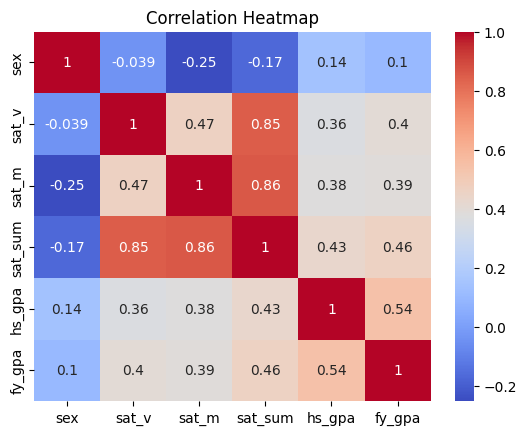

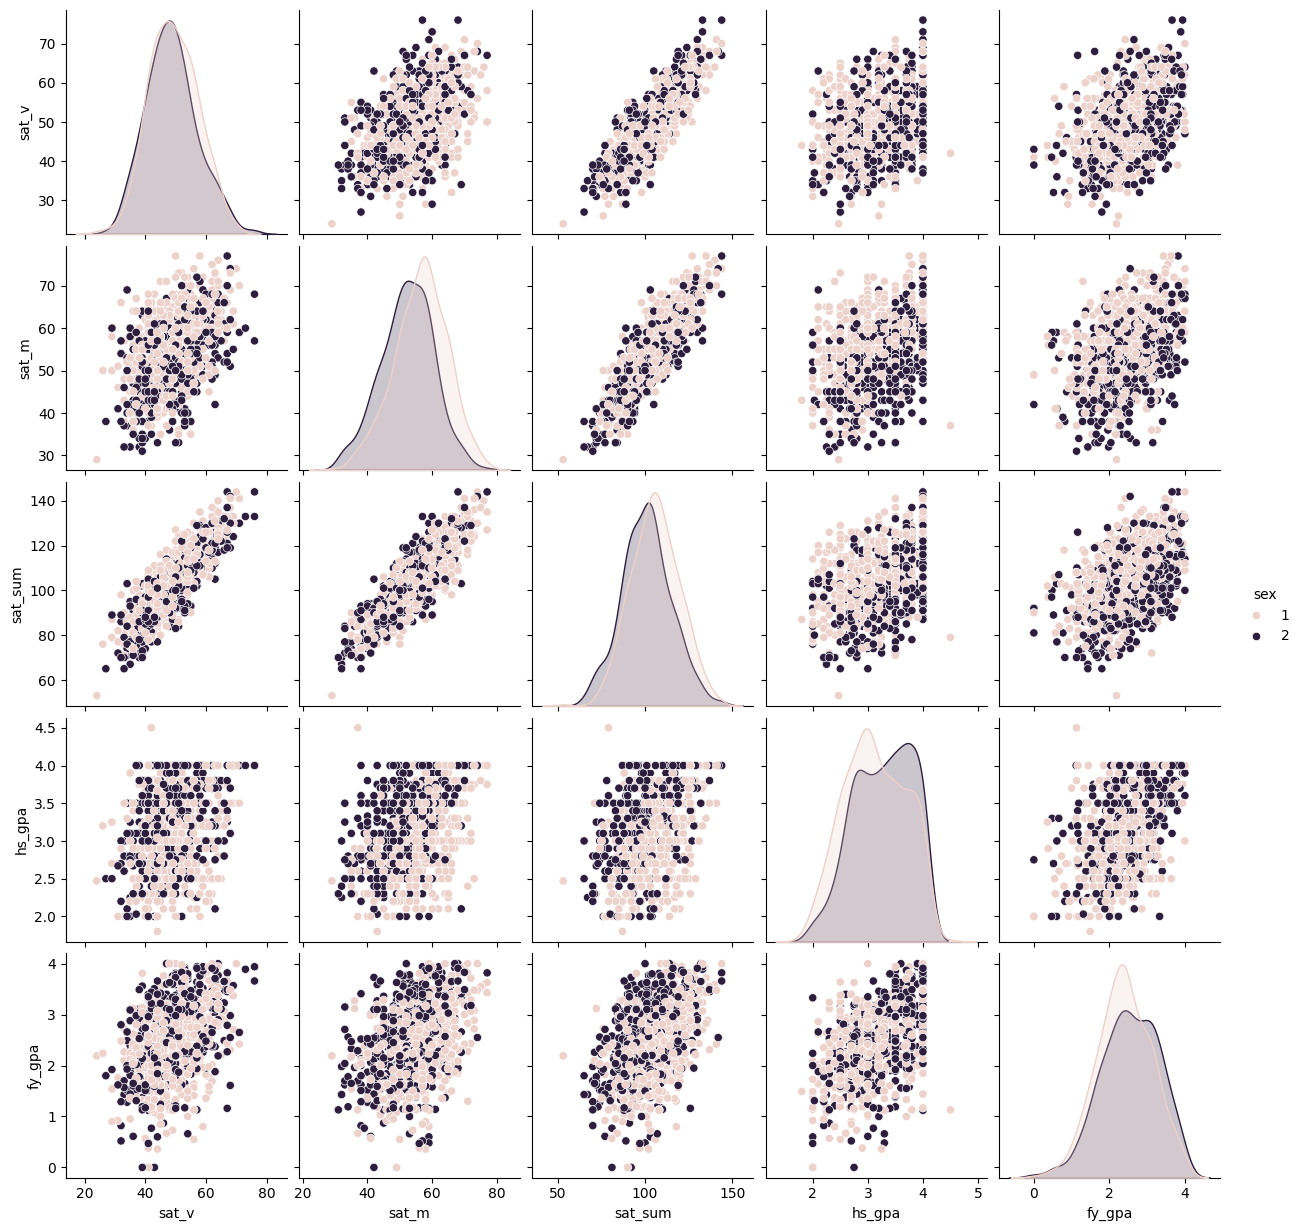

In [30]:
# Generate the correlation matrix
correlation_matrix = df[['sex', 'sat_v', 'sat_m', 'sat_sum', 'hs_gpa', 'fy_gpa']].corr()

# Print out the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

#Generate a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df, hue='sex')

MSE : 0.37955949992912585


0.33397169331374754

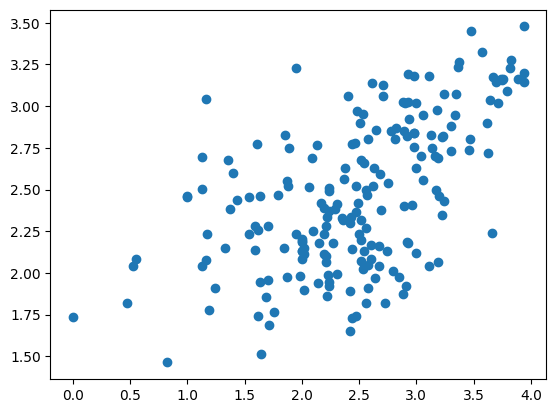

In [31]:
y = df['fy_gpa']
X = df.drop(['fy_gpa'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model1 = LinearRegression()
model1.fit(X_train, y_train) 
y_hat = model1.predict(X_test)
print('MSE :' , mean_squared_error(y_test, y_hat))
plt.scatter(y_test, y_hat)
r2_score(y_test, y_hat)

MSE : 0.3937848507079464


0.31095453575489096

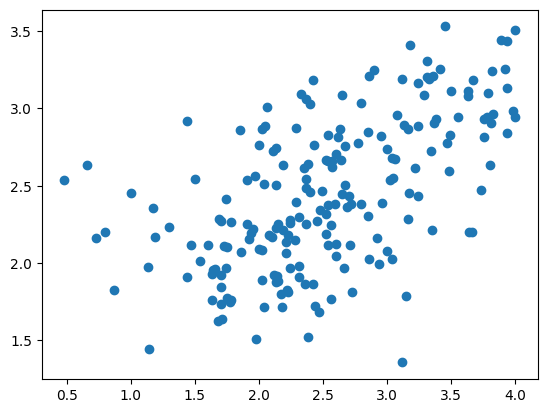

In [32]:
y = df['fy_gpa']
X = df.drop(['fy_gpa'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = linear_model.Ridge(alpha=0.01, fit_intercept=True)
reg.fit(X_train, y_train) 
y_hat = reg.predict(X_test)
print('MSE :' , mean_squared_error(y_test, y_hat))
plt.scatter(y_test, y_hat)
r2_score(y_test, y_hat)

In [33]:
y = df['fy_gpa']
X = df.drop(['fy_gpa'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
nBmodel=GaussianNB()
nBmodel.fit(X_train,y_train)
y_predicted=nBmodel.predict(X_test)
ac2=[metrics.confusion_matrix(y_test, y_predicted), metrics.accuracy_score(y_predicted,y_test)]

ValueError: Unknown label type: (array([0.  , 0.36, 0.47, 0.52, 0.61, 0.66, 0.67, 0.73, 0.77, 0.8 , 0.87,
       0.9 , 0.92, 0.95, 1.  , 1.08, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18,
       1.19, 1.24, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.35, 1.37, 1.38,
       1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.47, 1.5 , 1.51, 1.52, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       2.  , 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1 , 2.11,
       2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 , 2.21, 2.22,
       2.23, 2.24, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31, 2.32, 2.33, 2.34,
       2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.42, 2.43, 2.44, 2.45, 2.46,
       2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57,
       2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68,
       2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.77, 2.79, 2.8 , 2.81,
       2.82, 2.83, 2.84, 2.85, 2.86, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.98, 3.  , 3.02, 3.04, 3.05, 3.06, 3.07, 3.08,
       3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19,
       3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.27, 3.28, 3.29, 3.3 , 3.31,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.4 , 3.41, 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.51, 3.52, 3.54, 3.55, 3.57, 3.59,
       3.6 , 3.61, 3.62, 3.63, 3.64, 3.65, 3.66, 3.67, 3.69, 3.71, 3.72,
       3.73, 3.74, 3.75, 3.76, 3.77, 3.78, 3.79, 3.8 , 3.81, 3.82, 3.83,
       3.87, 3.89, 3.91, 3.92, 3.94, 3.98, 4.  ]),)